## EJEMPLO DE PROCESO ITERATIVO

##Librerias

In [2]:
!pip install numpy pandas matplotlib seaborn graphviz tabulate scikit-learn xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from tabulate import tabulate
from itertools import product

# Modelos de Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model Selection y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)

# Métricas
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)


##LLAMAR A AZURE Y DESCARGAR FICHERO

Usar para el caso practico  en local exportando a CSV

In [4]:
# import pyodbc
# import pandas as pd

# # Configuración de conexión a Azure SQL con AAD
# SERVER = 'uaxmathfis.database.windows.net'
# DATABASE = 'usecases'
# DRIVER = '{ODBC Driver 18 for SQL Server}'

# # Usar autenticación interactiva de Azure Active Directory (abre una ventana de login)
# conn_str = f"DRIVER={DRIVER};SERVER={SERVER};DATABASE={DATABASE};Authentication=ActiveDirectoryInteractive"

# try:
#     conn = pyodbc.connect(conn_str)
#     sql_query = "SELECT * FROM [DATAEX].[IA_PROPENSITY_TRAIN]"
#     data = pd.read_sql(sql_query, conn)

#     print(data.head())
#     print(" Conexión exitosa con Azure SQL usando AAD (interactivo).")

#     # Ruta de exportación
#     csv_path = r"C:\Users\jvela\OneDrive - Universidad Alfonso X el Sabio\Docencia\IA\CASOS DE USO\propensity\data_export.csv"
    
#     # Exportar a CSV
#     data.to_csv(csv_path, index=False, encoding='utf-8-sig')
#     print(f" Datos exportados exitosamente a: {csv_path}")

# except Exception as e:
#     print(f" Error de conexión: {e}")


data = pd.read_csv(r'C:\Users\AulaDigital\Downloads\propensity\Propensity.csv', delimiter=',')

display(data)

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,F,TIPO3,FUEL 1,Alta,M,Contado,SOLTERO,F,Empresa,...,NaN,SI,Averia muy grave,SI,6832,12528,False,5,38,0
58045,CLI57926,K,TIPO7,FUEL 1,Alta,A,Contado,NaN,NaN,Empresa,...,Medio-Bajo,NO DATA,No,SI,0,22072,False,3,54,0
58046,CLI57952,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,0,8352,False,8,63,0
58047,CLI58038,G,TIPO5,FUEL 2,Media,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,No,NO,2786,10441,False,13,62,0


##TRATAMIENTO INFORMACION LABEL ENCODERS

In [5]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(['Mas_1_coche','Tiempo'], axis=1)
y = data['Mas_1_coche']

# Convertir características categóricas a numéricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

""""LabelEncoder convierte categorías en valores numéricos enteros (0,1,2,...).
 **Útil para variables ordinales (cuando hay un orden lógico entre categorías).
También se usa en y cuando la variable objetivo es categórica."""

# Manejar valores nulos (si existen) después de la conversión
X.fillna(0, inplace=True)

# Eliminar la columna 'Customer ID' si existe
if 'CODE' in data.columns:
    data.drop(['CODE','Tiempo'], axis=1, inplace=True)

# Obtener información del dataframe
print(data.head())
print(data.info())
# Obtener información del dataframe
print(X.info())
# Obtener información del dataframe
print(y.info())

  PRODUCTO TIPO_CARROCERIA COMBUSTIBLE Potencia TRANS        FORMA_PAGO  \
0        A           TIPO1      FUEL 1     Baja     M           Contado   
1        A           TIPO1      FUEL 1     Baja     M           Contado   
2        A           TIPO1      FUEL 1     Baja     M             Otros   
3        A           TIPO1      FUEL 1     Baja     M  Financiera Marca   
4        A           TIPO1      FUEL 1     Baja     M  Financiera Marca   

  ESTADO_CIVIL GENERO    OcupaciOn               PROVINCIA  ... Campanna3  \
0       CASADO      M      Empresa                Asturias  ...        NO   
1       CASADO      F      Empresa                  Toledo  ...        NO   
2       CASADO      M      Empresa                  Lerida  ...        NO   
3       CASADO      F      Empresa                  Madrid  ...        NO   
4       CASADO      F  Funcionario  Santa Cruz de Tenerife  ...        SI   

   Zona_Renta REV_Garantia      Averia_grave QUEJA_CAC COSTE_VENTA km_anno  \
0  Medio

##ONEHOT ENCODER + CREAR TABLA DE ENTRENAMIENTO

In [6]:
# Codificar variables categóricas si es necesario
#categorical_columns = X.select_dtypes(include=['object']).columns
#encoder = OneHotEncoder()
#X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]).toarray())
#X_encoded.columns = encoder.get_feature_names_out(categorical_columns)
#X = pd.concat([X.drop(columns=categorical_columns), X_encoded], axis=1)
"""OneHotEncoder convierte cada categoría en una columna binaria (0 o 1).
Útil para variables nominales (sin orden entre categorías).
Se recomienda si hay muchas categorías para evitar interpretaciones incorrectas."""""

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir y_train a formato numérico
y_train = y_train.astype(int)

# Convertir y_test a formato numérico
y_test = y_test.astype(int)



##ITERACION DEL MODELO

Criterion: gini, Splitter: best, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 1
Accuracy: 0.7933677863910422, F1 Score: 0.7979961577662463, Recall: 0.7933677863910422, ROC-AUC: 0.8192628081819413, CV Score: 0.7897457194988002, Train Score: 0.7906716337561102, Overfitting: OK
Criterion: gini, Splitter: best, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 2
Accuracy: 0.7933677863910422, F1 Score: 0.7979961577662463, Recall: 0.7933677863910422, ROC-AUC: 0.8192628081819413, CV Score: 0.7897457194988002, Train Score: 0.7906716337561102, Overfitting: OK
Criterion: gini, Splitter: best, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 5
Accuracy: 0.7933677863910422, F1 Score: 0.7979961577662463, Recall: 0.7933677863910422, ROC-AUC: 0.8192628081819413, CV Score: 0.7897457194988002, Train Score: 0.7906716337561102, Overfitting: OK
Criterion: gini, Splitter: best, Max Depth: 3, Min Samples Split: 5, Min Samples Leaf: 1
Accuracy: 0.7933677863910422, F1 Score: 0.79799615776624

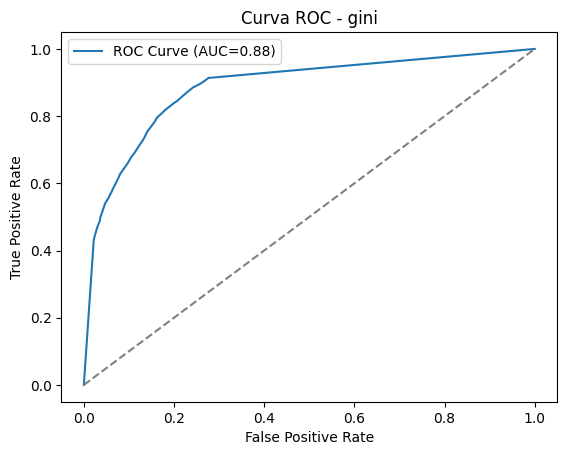

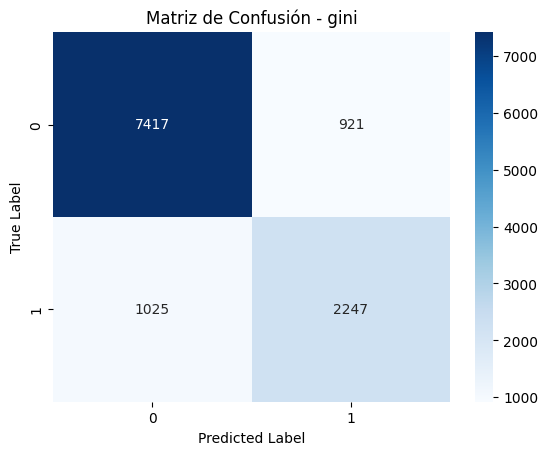

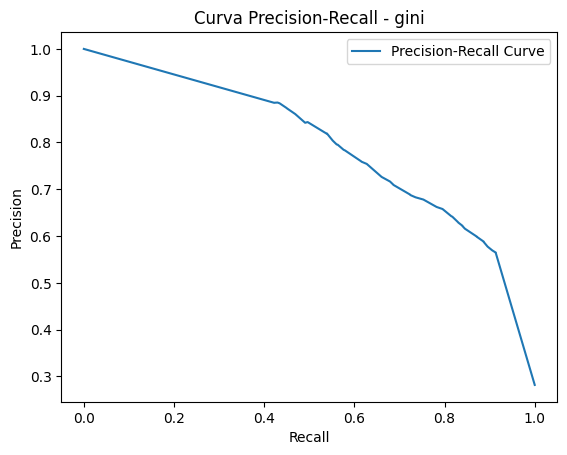


--------------------------------------------------
Modelo Optimizado 51
--------------------------------------------------
Criterion: gini, Splitter: random, Max Depth: 100, Min Samples Split: 5, Min Samples Leaf: 5

Classification Report for gini - random:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      8338
           1       0.71      0.69      0.70      3272

    accuracy                           0.83     11610
   macro avg       0.79      0.79      0.79     11610
weighted avg       0.83      0.83      0.83     11610


ROC-AUC Score: 0.8848059756463029



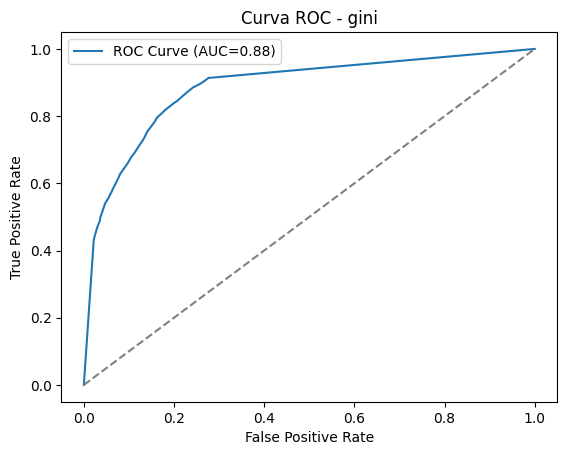

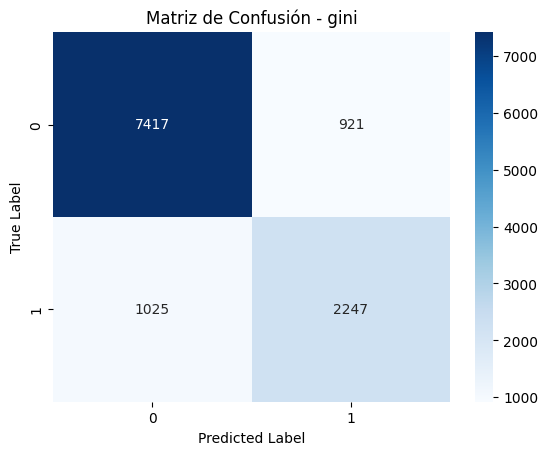

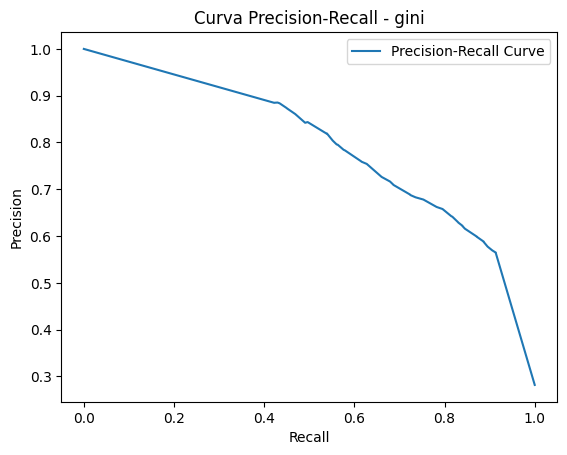


--------------------------------------------------
Modelo Optimizado 54
--------------------------------------------------
Criterion: gini, Splitter: random, Max Depth: 100, Min Samples Split: 10, Min Samples Leaf: 5

Classification Report for gini - random:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      8338
           1       0.71      0.69      0.70      3272

    accuracy                           0.83     11610
   macro avg       0.79      0.79      0.79     11610
weighted avg       0.83      0.83      0.83     11610


ROC-AUC Score: 0.8848059756463029



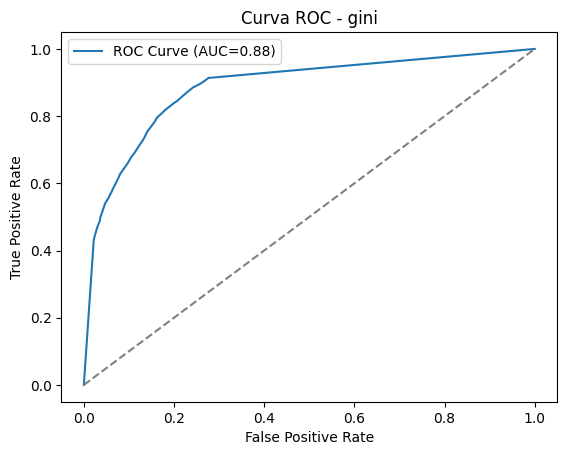

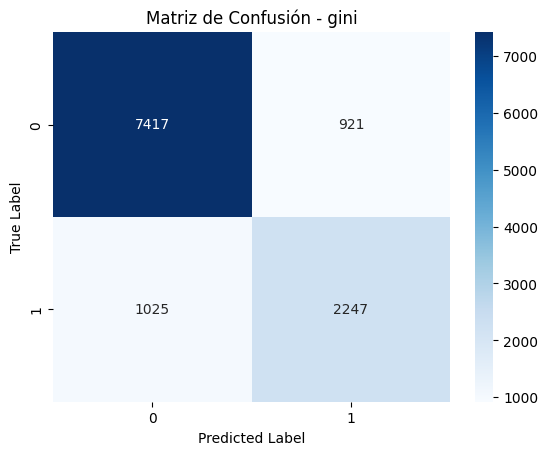

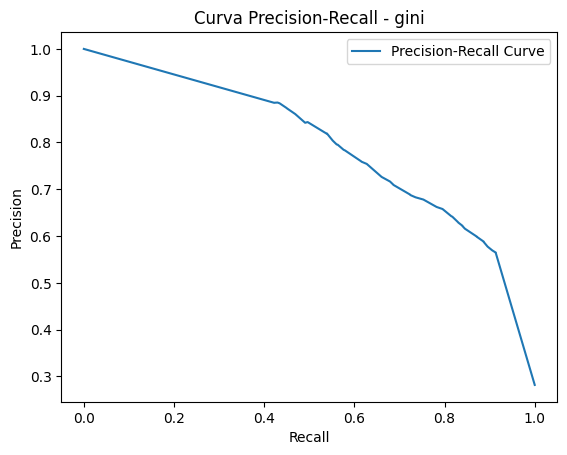

,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
47,gini,random,100,2,5,0.839707,0.838759,0.839707,0.886759,0.83025,0.905209,OK
50,gini,random,100,5,5,0.839707,0.838759,0.839707,0.886759,0.83025,0.905209,OK
53,gini,random,100,10,5,0.839707,0.838759,0.839707,0.886759,0.83025,0.905209,OK


In [7]:


# Definir hiperparámetros a iterar
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [ 3, 5, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
"""splitter="best" (por defecto)
Encuentra el mejor punto de división en cada nodo, basado en la métrica de evaluación (criterion).
Tiende a crear árboles más profundos, porque optimiza cada división localmente.
Útil para conjuntos de datos pequeños.
splitter="random". En lugar de buscar el mejor punto de división, elige un punto de división de manera aleatoria 
entre los mejores candidatos.
Puede generar árboles más pequeños y con menos sobreajuste.
Útil para conjuntos de datos grandes o cuando se usa en bagging/random forests.
----------------------------------------------------
Define el número mínimo de muestras necesarias para dividir un nodo.
Si min_samples_split=2, cualquier nodo con 2 o más muestras puede dividirse.
Si min_samples_split=10, un nodo necesita al menos 10 muestras para dividirse.
Valores bajos (2-5) → Árbol más profundo y detallado, mayor riesgo de sobreajuste.
Valores altos (10-20) → Árbol más generalizado, menor sobreajuste.
------------------------------------------------------
Define el número mínimo de muestras necesarias en una hoja (nodo final).
Si min_samples_leaf=1, el árbol puede crear nodos con solo 1 muestra.
Si min_samples_leaf=5, cada hoja debe tener al menos 5 muestras.
Valores bajos (1-3) → Árbol más detallado, mayor riesgo de sobreajuste.
Valores altos (5-10) → Árbol más pequeño y estable, menos sobreajuste.
"""


# Almacenar resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):   #el asterisco hace que pase port todo el grid de parametros
    criterion, splitter, max_depth, min_samples_split, min_samples_leaf = params
    
    """Este código es un bucle for que recorre todas las combinaciones posibles de hiperparámetros usando 
    itertools.product. Es una técnica común para realizar búsqueda exhaustiva (grid search) en modelos de machine 
    learning.  Genera todas las combinaciones de valores de param_grid.
    param_grid.values() obtiene las listas de valores de cada hiperparámetro.
    *param_grid.values() descomprime los valores dentro de product().
    product(*param_grid.values()) devuelve todas las combinaciones posibles de hiperparámetros."""   

    # Construir el modelo con los hiperparámetros actuales
    model = DecisionTreeClassifier(
        criterion=criterion, 
        splitter=splitter, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Calcular Train Score
    train_score = model.score(X_train, y_train)
    
    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
     overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
     overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
     overfitting_warning = "MILD OVERFITTING"
    else:
     overfitting_warning = "OK"
    """Esta línea de código verifica si hay sobreajuste (overfitting) comparando el rendimiento en entrenamiento 
    (train_score) con el rendimiento promedio en validación (mean_cv_score). Si el modelo tiene un rendimiento 
    muy alto en entrenamiento, pero mucho menor en validación, significa que está memorizando los datos 
    de entrenamiento en lugar de generalizar bien. Se usa un umbral del 20% (1.2 * mean_cv_score) para marcar 
    la diferencia como sospechosa."""
    
    # Guardar los resultados
    results.append({
        'criterion': criterion,
        'splitter': splitter,
        'max_depth': int(max_depth) if pd.notna(max_depth) else None,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

# Imprimir resultados parciales
    print(f"Criterion: {criterion}, Splitter: {splitter}, Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}")
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

for index, row in best_models.iterrows():
    print('\n' + '-' * 50)
    print(f'Modelo Optimizado {index + 1}')
    print('-' * 50)
    print(f'Criterion: {row["criterion"]}, Splitter: {row["splitter"]}, Max Depth: {row["max_depth"]}, Min Samples Split: {row["min_samples_split"]}, Min Samples Leaf: {row["min_samples_leaf"]}')
    print(f'\nClassification Report for {row["criterion"]} - {row["splitter"]}:')
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["criterion"]}')
        plt.legend()
        plt.show()
        
        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()
        
        # Curva Precision-Recall
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall, precision, label='Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Curva Precision-Recall - {row["criterion"]}')
        plt.legend()
        plt.show()

# Mostrar los mejores modelos
from IPython.display import display
display(best_models)


# Random Forest Classifier

In [9]:
# Define hyperparameters to iterate over
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

"""
Explanations:
- n_estimators: Number of trees in the forest. More trees can improve performance but increase computation time.
- criterion: The function used to measure the quality of a split. 'gini', 'entropy', and 'log_loss' are common choices.
- max_depth: The maximum depth of the tree. Smaller values prevent overfitting.
- min_samples_split: The minimum number of samples required to split an internal node.
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
- max_features: The number of features to consider when looking for the best split.
- bootstrap: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
"""

# Store results
results = []

# Iterate over all combinations of hyperparameters
for params in product(*param_grid.values()):
    n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, max_features, bootstrap = params

    # Build the model with the current hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Calculate ROC-AUC if there is more than one class
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)

    # Calculate train score
    train_score = model.score(X_train, y_train)

    # Determine if there is overfitting
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"

    # Save results
    results.append({
        'n_estimators': n_estimators,
        'criterion': criterion,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'max_features': max_features,
        'bootstrap': bootstrap,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

    # Print partial results for current hyperparameter combination
    print(f"n_estimators: {n_estimators}, criterion: {criterion}, max_depth: {max_depth}, "
          f"min_samples_split: {min_samples_split}, min_samples_leaf: {min_samples_leaf}, "
          f"max_features: {max_features}, bootstrap: {bootstrap}")
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, "
          f"CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}\n")

# Convert results to a DataFrame and sort by f1_score and accuracy in descending order
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Select the top 3 models without overfitting and optimizing F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

for index, row in best_models.iterrows():
    print('\n' + '-' * 50)
    print(f'Model Optimized {index + 1}')
    print('-' * 50)
    print(f"n_estimators: {row['n_estimators']}, criterion: {row['criterion']}, max_depth: {row['max_depth']}, "
          f"min_samples_split: {row['min_samples_split']}, min_samples_leaf: {row['min_samples_leaf']}, "
          f"max_features: {row['max_features']}, bootstrap: {row['bootstrap']}")
    print(f'\nClassification Report for {row["criterion"]} with bootstrap={row["bootstrap"]}:')
    
    # Retrain the model (optional: you could store the model in the results as well)
    best_model = RandomForestClassifier(
        n_estimators=row['n_estimators'],
        criterion=row['criterion'],
        max_depth=row['max_depth'],
        min_samples_split=row['min_samples_split'],
        min_samples_leaf=row['min_samples_leaf'],
        max_features=row['max_features'],
        bootstrap=row['bootstrap'],
        random_state=42
    )
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {row["criterion"]}')
        plt.legend()
        plt.show()
        
        # Confusion Matrix
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {row["criterion"]}')
        plt.show()
        
        # Precision-Recall Curve
        precision, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall_vals, precision, label='Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {row["criterion"]}')
        plt.legend()
        plt.show()

# Display the best models
from IPython.display import display
display(best_models)



n_estimators: 50, criterion: gini, max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt, bootstrap: True
Accuracy: 0.7481481481481481, F1 Score: 0.6737645464180424, Recall: 0.7481481481481481, ROC-AUC: 0.8536846688592774, CV Score: 0.7399599288902541, Train Score: 0.7398307457094253, Overfitting: OK

n_estimators: 50, criterion: gini, max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, max_features: sqrt, bootstrap: False
Accuracy: 0.7461670973298881, F1 Score: 0.6702987515970982, Recall: 0.7461670973298881, ROC-AUC: 0.849449522203996, CV Score: 0.7407135686599228, Train Score: 0.7378927194814703, Overfitting: OK

n_estimators: 50, criterion: gini, max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, max_features: log2, bootstrap: True
Accuracy: 0.7481481481481481, F1 Score: 0.6737645464180424, Recall: 0.7481481481481481, ROC-AUC: 0.8536846688592774, CV Score: 0.7399599288902541, Train Score: 0.7398307457094253, Overfitting: OK

n_estimators: 50, criteri

KeyboardInterrupt: 

# XGB classifier

In [12]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:

# Define hyperparameters to iterate over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'min_child_weight': [1, 3, 5]
}

"""
Explanations:
- n_estimators: Number of boosting rounds (trees).
- max_depth: Maximum depth of a tree. Lower values prevent overfitting.
- learning_rate: Step size shrinkage used to prevent overfitting.
- subsample: Fraction of samples to be used for each tree.
- colsample_bytree: Fraction of features to be used for each tree.
- gamma: Minimum loss reduction required to split a node.
- min_child_weight: Minimum sum of instance weight needed in a child.
"""

# Store results
results = []

# Iterate over all combinations of hyperparameters
for params in product(*param_grid.values()):
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma, min_child_weight = params

    # Build the model with the current hyperparameters
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        min_child_weight=min_child_weight,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calculate ROC-AUC if there is more than one class
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Calculate train score
    train_score = model.score(X_train, y_train)
    
    # Determine if there is overfitting
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"
    
    # Save the results
    results.append({
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'subsample': subsample,
        'colsample_bytree': colsample_bytree,
        'gamma': gamma,
        'min_child_weight': min_child_weight,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })
    
    # Print partial results for the current hyperparameter combination
    print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, learning_rate: {learning_rate}, "
          f"subsample: {subsample}, colsample_bytree: {colsample_bytree}, gamma: {gamma}, "
          f"min_child_weight: {min_child_weight}")
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, "
          f"CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}\n")

# Convert results to a DataFrame and sort by f1_score and accuracy in descending order
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Select the top 3 models without overfitting and with the best F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

for index, row in best_models.iterrows():
    print('\n' + '-' * 50)
    print(f'Model Optimized {index + 1}')
    print('-' * 50)
    print(f"n_estimators: {row['n_estimators']}, max_depth: {row['max_depth']}, learning_rate: {row['learning_rate']}, "
          f"subsample: {row['subsample']}, colsample_bytree: {row['colsample_bytree']}, gamma: {row['gamma']}, "
          f"min_child_weight: {row['min_child_weight']}")
    print(f'\nClassification Report for model with max_depth={row["max_depth"]} and learning_rate={row["learning_rate"]}:')
    
    # Retrain the best model (optional: you could store the model in the results)
    best_model = XGBClassifier(
        n_estimators=row['n_estimators'],
        max_depth=row['max_depth'],
        learning_rate=row['learning_rate'],
        subsample=row['subsample'],
        colsample_bytree=row['colsample_bytree'],
        gamma=row['gamma'],
        min_child_weight=row['min_child_weight'],
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - max_depth {row["max_depth"]}')
        plt.legend()
        plt.show()
        
        # Confusion Matrix
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - max_depth {row["max_depth"]}')
        plt.show()
        
        # Precision-Recall Curve
        precision, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall_vals, precision, label='Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - max_depth {row["max_depth"]}')
        plt.legend()
        plt.show()

# Display the best models
from IPython.display import display
display(best_models)


c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8628797641047175, CV Score: 0.7065612912087479, Train Score: 0.706475160963845, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8628826231393549, CV Score: 0.7065612912087479, Train Score: 0.7065182282133552, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.862874925738408, CV Score: 0.7065612912087479, Train Score: 0.7065182282133552, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8628797641047175, CV Score: 0.7065612912087479, Train Score: 0.706475160963845, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8628826231393549, CV Score: 0.7065612912087479, Train Score: 0.7065182282133552, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.862874925738408, CV Score: 0.7065612912087479, Train Score: 0.7065182282133552, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8628797641047175, CV Score: 0.7065612912087479, Train Score: 0.706475160963845, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8628826231393549, CV Score: 0.7065612912087479, Train Score: 0.7065182282133552, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.862874925738408, CV Score: 0.7065612912087479, Train Score: 0.7065182282133552, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.7229974160206718, F1 Score: 0.6118527372532329, Recall: 0.7229974160206718, ROC-AUC: 0.8634721157618727, CV Score: 0.7115571051455422, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.7229974160206718, F1 Score: 0.6118527372532329, Recall: 0.7229974160206718, ROC-AUC: 0.8634762760238128, CV Score: 0.7115571051455422, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.7229974160206718, F1 Score: 0.6118527372532329, Recall: 0.7229974160206718, ROC-AUC: 0.8634762760238128, CV Score: 0.7115571051455422, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7229974160206718, F1 Score: 0.6118527372532329, Recall: 0.7229974160206718, ROC-AUC: 0.8634721157618727, CV Score: 0.7115571051455422, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7229974160206718, F1 Score: 0.6118527372532329, Recall: 0.7229974160206718, ROC-AUC: 0.8634762760238128, CV Score: 0.7115571051455422, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7229974160206718, F1 Score: 0.6118527372532329, Recall: 0.7229974160206718, ROC-AUC: 0.8634762760238128, CV Score: 0.7115571051455422, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7229974160206718, F1 Score: 0.6118527372532329, Recall: 0.7229974160206718, ROC-AUC: 0.8634721157618727, CV Score: 0.7115571051455422, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7229974160206718, F1 Score: 0.6118527372532329, Recall: 0.7229974160206718, ROC-AUC: 0.8634762760238128, CV Score: 0.7115571051455422, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7229974160206718, F1 Score: 0.6118527372532329, Recall: 0.7229974160206718, ROC-AUC: 0.8634762760238128, CV Score: 0.7115571051455422, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8564762779298362, CV Score: 0.7213763286125002, Train Score: 0.716617498223476, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8564762779298362, CV Score: 0.7213763286125002, Train Score: 0.716617498223476, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8564762779298362, CV Score: 0.7213763286125002, Train Score: 0.716617498223476, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8564762779298362, CV Score: 0.7213763286125002, Train Score: 0.716617498223476, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8564762779298362, CV Score: 0.7213763286125002, Train Score: 0.716617498223476, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8564762779298362, CV Score: 0.7213763286125002, Train Score: 0.716617498223476, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8564762779298362, CV Score: 0.7213763286125002, Train Score: 0.716617498223476, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8564762779298362, CV Score: 0.7213763286125002, Train Score: 0.716617498223476, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8564762779298362, CV Score: 0.7213763286125002, Train Score: 0.716617498223476, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8623363642521558, CV Score: 0.7065828266884507, Train Score: 0.7065612954628653, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8623363642521558, CV Score: 0.7065828266884507, Train Score: 0.7065612954628653, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8623363642521558, CV Score: 0.7065828266884507, Train Score: 0.7065612954628653, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8623363642521558, CV Score: 0.7065828266884507, Train Score: 0.7065612954628653, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8623363642521558, CV Score: 0.7065828266884507, Train Score: 0.7065612954628653, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8623363642521558, CV Score: 0.7065828266884507, Train Score: 0.7065612954628653, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8623363642521558, CV Score: 0.7065828266884507, Train Score: 0.7065612954628653, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8623363642521558, CV Score: 0.7065828266884507, Train Score: 0.7065612954628653, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7188630490956073, F1 Score: 0.6019900781312868, Recall: 0.7188630490956073, ROC-AUC: 0.8623363642521558, CV Score: 0.7065828266884507, Train Score: 0.7065612954628653, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.7231696813092162, F1 Score: 0.6120941223668814, Recall: 0.7231696813092162, ROC-AUC: 0.8621568315386415, CV Score: 0.7114494486147408, Train Score: 0.7109972221624066, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.7231696813092162, F1 Score: 0.6120941223668814, Recall: 0.7231696813092162, ROC-AUC: 0.8621568315386415, CV Score: 0.7114494486147408, Train Score: 0.7109972221624066, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.7231696813092162, F1 Score: 0.6120941223668814, Recall: 0.7231696813092162, ROC-AUC: 0.8621568315386415, CV Score: 0.7114494486147408, Train Score: 0.7109972221624066, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7231696813092162, F1 Score: 0.6120941223668814, Recall: 0.7231696813092162, ROC-AUC: 0.8621568315386415, CV Score: 0.7114494486147408, Train Score: 0.7109972221624066, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7231696813092162, F1 Score: 0.6120941223668814, Recall: 0.7231696813092162, ROC-AUC: 0.8621568315386415, CV Score: 0.7114494486147408, Train Score: 0.7109972221624066, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7231696813092162, F1 Score: 0.6120941223668814, Recall: 0.7231696813092162, ROC-AUC: 0.8621568315386415, CV Score: 0.7114494486147408, Train Score: 0.7109972221624066, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7231696813092162, F1 Score: 0.6120941223668814, Recall: 0.7231696813092162, ROC-AUC: 0.8621568315386415, CV Score: 0.7114494486147408, Train Score: 0.7109972221624066, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7231696813092162, F1 Score: 0.6120941223668814, Recall: 0.7231696813092162, ROC-AUC: 0.8621568315386415, CV Score: 0.7114494486147408, Train Score: 0.7109972221624066, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7231696813092162, F1 Score: 0.6120941223668814, Recall: 0.7231696813092162, ROC-AUC: 0.8621568315386415, CV Score: 0.7114494486147408, Train Score: 0.7109972221624066, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8563812883367221, CV Score: 0.716488301050054, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8563812883367221, CV Score: 0.716488301050054, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8563812883367221, CV Score: 0.716488301050054, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8563812883367221, CV Score: 0.716488301050054, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8563812883367221, CV Score: 0.716488301050054, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8563812883367221, CV Score: 0.716488301050054, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8563812883367221, CV Score: 0.716488301050054, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8563812883367221, CV Score: 0.716488301050054, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7283376399655469, F1 Score: 0.6239954564223813, Recall: 0.7283376399655469, ROC-AUC: 0.8563812883367221, CV Score: 0.716488301050054, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.7189491817398794, F1 Score: 0.602191574517942, Recall: 0.7189491817398794, ROC-AUC: 0.862642097686909, CV Score: 0.7065612912087479, Train Score: 0.7067120308361506, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.7189491817398794, F1 Score: 0.602191574517942, Recall: 0.7189491817398794, ROC-AUC: 0.8626423909212309, CV Score: 0.7065612912087479, Train Score: 0.7067120308361506, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.7189491817398794, F1 Score: 0.602191574517942, Recall: 0.7189491817398794, ROC-AUC: 0.862640118355237, CV Score: 0.7065612912087479, Train Score: 0.7067120308361506, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7189491817398794, F1 Score: 0.602191574517942, Recall: 0.7189491817398794, ROC-AUC: 0.862642097686909, CV Score: 0.7065612912087479, Train Score: 0.7067120308361506, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7189491817398794, F1 Score: 0.602191574517942, Recall: 0.7189491817398794, ROC-AUC: 0.8626423909212309, CV Score: 0.7065612912087479, Train Score: 0.7067120308361506, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7189491817398794, F1 Score: 0.602191574517942, Recall: 0.7189491817398794, ROC-AUC: 0.862640118355237, CV Score: 0.7065612912087479, Train Score: 0.7067120308361506, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7189491817398794, F1 Score: 0.602191574517942, Recall: 0.7189491817398794, ROC-AUC: 0.862642097686909, CV Score: 0.7065612912087479, Train Score: 0.7067120308361506, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7189491817398794, F1 Score: 0.602191574517942, Recall: 0.7189491817398794, ROC-AUC: 0.8626423909212309, CV Score: 0.7065612912087479, Train Score: 0.7067120308361506, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7189491817398794, F1 Score: 0.602191574517942, Recall: 0.7189491817398794, ROC-AUC: 0.862640118355237, CV Score: 0.7065612912087479, Train Score: 0.7067120308361506, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.7229112833763996, F1 Score: 0.6115043575276778, Recall: 0.7229112833763996, ROC-AUC: 0.8622890985449125, CV Score: 0.7102866069071017, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.7229112833763996, F1 Score: 0.6115043575276778, Recall: 0.7229112833763996, ROC-AUC: 0.8622890985449125, CV Score: 0.7102866069071017, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.7229112833763996, F1 Score: 0.6115043575276778, Recall: 0.7229112833763996, ROC-AUC: 0.8622890985449125, CV Score: 0.7102866069071017, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7229112833763996, F1 Score: 0.6115043575276778, Recall: 0.7229112833763996, ROC-AUC: 0.8622890985449125, CV Score: 0.7102866069071017, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7229112833763996, F1 Score: 0.6115043575276778, Recall: 0.7229112833763996, ROC-AUC: 0.8622890985449125, CV Score: 0.7102866069071017, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7229112833763996, F1 Score: 0.6115043575276778, Recall: 0.7229112833763996, ROC-AUC: 0.8622890985449125, CV Score: 0.7102866069071017, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7229112833763996, F1 Score: 0.6115043575276778, Recall: 0.7229112833763996, ROC-AUC: 0.8622890985449125, CV Score: 0.7102866069071017, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7229112833763996, F1 Score: 0.6115043575276778, Recall: 0.7229112833763996, ROC-AUC: 0.8622890985449125, CV Score: 0.7102866069071017, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7229112833763996, F1 Score: 0.6115043575276778, Recall: 0.7229112833763996, ROC-AUC: 0.8622890985449125, CV Score: 0.7102866069071017, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.7282515073212747, F1 Score: 0.6238048855619827, Recall: 0.7282515073212747, ROC-AUC: 0.8562608973204835, CV Score: 0.721290195968228, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.7282515073212747, F1 Score: 0.6238048855619827, Recall: 0.7282515073212747, ROC-AUC: 0.8562608973204835, CV Score: 0.721290195968228, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.7282515073212747, F1 Score: 0.6238048855619827, Recall: 0.7282515073212747, ROC-AUC: 0.8562608973204835, CV Score: 0.721290195968228, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7282515073212747, F1 Score: 0.6238048855619827, Recall: 0.7282515073212747, ROC-AUC: 0.8562608973204835, CV Score: 0.721290195968228, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7282515073212747, F1 Score: 0.6238048855619827, Recall: 0.7282515073212747, ROC-AUC: 0.8562608973204835, CV Score: 0.721290195968228, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7282515073212747, F1 Score: 0.6238048855619827, Recall: 0.7282515073212747, ROC-AUC: 0.8562608973204835, CV Score: 0.721290195968228, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7282515073212747, F1 Score: 0.6238048855619827, Recall: 0.7282515073212747, ROC-AUC: 0.8562608973204835, CV Score: 0.721290195968228, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7282515073212747, F1 Score: 0.6238048855619827, Recall: 0.7282515073212747, ROC-AUC: 0.8562608973204835, CV Score: 0.721290195968228, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:29:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.01, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7282515073212747, F1 Score: 0.6238048855619827, Recall: 0.7282515073212747, ROC-AUC: 0.8562608973204835, CV Score: 0.721290195968228, Train Score: 0.7164667628501906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.8254952627045651, F1 Score: 0.8186540853670485, Recall: 0.8254952627045651, ROC-AUC: 0.895671058681466, CV Score: 0.8213569842426509, Train Score: 0.8229290036391825, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.8254952627045651, F1 Score: 0.8186540853670485, Recall: 0.8254952627045651, ROC-AUC: 0.8956799473468453, CV Score: 0.8212493277118496, Train Score: 0.8229074700144275, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.8254952627045651, F1 Score: 0.8186540853670485, Recall: 0.8254952627045651, ROC-AUC: 0.8955269523394528, CV Score: 0.8206894214700199, Train Score: 0.8229936045134477, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8254952627045651, F1 Score: 0.8186540853670485, Recall: 0.8254952627045651, ROC-AUC: 0.895671058681466, CV Score: 0.8213569842426509, Train Score: 0.8229290036391825, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8254952627045651, F1 Score: 0.8186540853670485, Recall: 0.8254952627045651, ROC-AUC: 0.8956799473468453, CV Score: 0.8212493277118496, Train Score: 0.8229074700144275, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8254952627045651, F1 Score: 0.8186540853670485, Recall: 0.8254952627045651, ROC-AUC: 0.8955269523394528, CV Score: 0.820667888308952, Train Score: 0.8229936045134477, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8254952627045651, F1 Score: 0.8186540853670485, Recall: 0.8254952627045651, ROC-AUC: 0.895671058681466, CV Score: 0.8213569842426509, Train Score: 0.8229290036391825, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8254952627045651, F1 Score: 0.8186540853670485, Recall: 0.8254952627045651, ROC-AUC: 0.8956799473468453, CV Score: 0.8212493277118496, Train Score: 0.8229074700144275, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8254952627045651, F1 Score: 0.8186540853670485, Recall: 0.8254952627045651, ROC-AUC: 0.8955269523394528, CV Score: 0.8206894214700201, Train Score: 0.8229936045134477, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.8287683031869079, F1 Score: 0.8264664740240377, Recall: 0.8287683031869079, ROC-AUC: 0.8996310415800404, CV Score: 0.8278170554507069, Train Score: 0.8293890910656991, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.8287683031869079, F1 Score: 0.8264664740240377, Recall: 0.8287683031869079, ROC-AUC: 0.8996307116914283, CV Score: 0.8277309228064347, Train Score: 0.8293890910656991, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.8295434969853575, F1 Score: 0.826851341206464, Recall: 0.8295434969853575, ROC-AUC: 0.8985372775597744, CV Score: 0.8266327130428863, Train Score: 0.829367557440944, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8287683031869079, F1 Score: 0.8264664740240377, Recall: 0.8287683031869079, ROC-AUC: 0.8996310415800404, CV Score: 0.8278385909304097, Train Score: 0.8293890910656991, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8287683031869079, F1 Score: 0.8264664740240377, Recall: 0.8287683031869079, ROC-AUC: 0.8996307116914283, CV Score: 0.8277524582861375, Train Score: 0.8293890910656991, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8295434969853575, F1 Score: 0.826851341206464, Recall: 0.8295434969853575, ROC-AUC: 0.8985372775597744, CV Score: 0.8266327130428863, Train Score: 0.829367557440944, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8287683031869079, F1 Score: 0.8264664740240377, Recall: 0.8287683031869079, ROC-AUC: 0.8996273028424376, CV Score: 0.8278385909304097, Train Score: 0.8293890910656991, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8287683031869079, F1 Score: 0.8264664740240377, Recall: 0.8287683031869079, ROC-AUC: 0.8996307116914283, CV Score: 0.8277739937658403, Train Score: 0.8293890910656991, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8295434969853575, F1 Score: 0.826851341206464, Recall: 0.8295434969853575, ROC-AUC: 0.8985372775597744, CV Score: 0.8266327130428863, Train Score: 0.829367557440944, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.8323858742463394, F1 Score: 0.8287363913111195, Recall: 0.8323858742463394, ROC-AUC: 0.8995908868051007, CV Score: 0.8303580959816482, Train Score: 0.830917978423308, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.8321274763135228, F1 Score: 0.8284625289023034, Recall: 0.8321274763135228, ROC-AUC: 0.8996129710149603, CV Score: 0.8295398242678887, Train Score: 0.830896444798553, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.8319552110249785, F1 Score: 0.828384747154126, Recall: 0.8319552110249785, ROC-AUC: 0.8996620877638597, CV Score: 0.8289369212629658, Train Score: 0.8306811085510024, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8323858742463394, F1 Score: 0.8287363913111195, Recall: 0.8323858742463394, ROC-AUC: 0.8995908868051007, CV Score: 0.8303580959816482, Train Score: 0.830917978423308, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8321274763135228, F1 Score: 0.8284625289023034, Recall: 0.8321274763135228, ROC-AUC: 0.8996129710149603, CV Score: 0.8295398242678887, Train Score: 0.830896444798553, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8319552110249785, F1 Score: 0.828384747154126, Recall: 0.8319552110249785, ROC-AUC: 0.8996620877638597, CV Score: 0.8289584544240339, Train Score: 0.8306811085510024, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8320413436692506, F1 Score: 0.8284629144274918, Recall: 0.8320413436692506, ROC-AUC: 0.8995916931994855, CV Score: 0.8300996818183883, Train Score: 0.8307457094252676, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8322136089577951, F1 Score: 0.8285603752693018, Recall: 0.8322136089577951, ROC-AUC: 0.899615720086727, CV Score: 0.8296905842189822, Train Score: 0.830896444798553, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8319552110249785, F1 Score: 0.828384747154126, Recall: 0.8319552110249785, ROC-AUC: 0.8996620877638597, CV Score: 0.8289584544240339, Train Score: 0.8306811085510024, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.8268733850129198, F1 Score: 0.8202968362253329, Recall: 0.8268733850129198, ROC-AUC: 0.8960404239640472, CV Score: 0.8227136220812679, Train Score: 0.8238118822541398, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.8268733850129198, F1 Score: 0.8202968362253329, Recall: 0.8268733850129198, ROC-AUC: 0.8960430447457981, CV Score: 0.8229289536919483, Train Score: 0.8238549495036499, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.8268733850129198, F1 Score: 0.8202968362253329, Recall: 0.8268733850129198, ROC-AUC: 0.8960430447457981, CV Score: 0.8229935531751524, Train Score: 0.8238549495036499, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8268733850129198, F1 Score: 0.8202968362253329, Recall: 0.8268733850129198, ROC-AUC: 0.8960404239640472, CV Score: 0.8227136220812679, Train Score: 0.8238118822541398, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8268733850129198, F1 Score: 0.8202968362253329, Recall: 0.8268733850129198, ROC-AUC: 0.8960430447457981, CV Score: 0.8229289536919483, Train Score: 0.8238549495036499, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8268733850129198, F1 Score: 0.8202968362253329, Recall: 0.8268733850129198, ROC-AUC: 0.8960430447457981, CV Score: 0.8229935531751524, Train Score: 0.8238549495036499, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8268733850129198, F1 Score: 0.8202968362253329, Recall: 0.8268733850129198, ROC-AUC: 0.8960404239640472, CV Score: 0.8227136220812679, Train Score: 0.8238118822541398, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8268733850129198, F1 Score: 0.8202968362253329, Recall: 0.8268733850129198, ROC-AUC: 0.8960430447457981, CV Score: 0.8229289536919483, Train Score: 0.8238549495036499, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8268733850129198, F1 Score: 0.8202968362253329, Recall: 0.8268733850129198, ROC-AUC: 0.8960430447457981, CV Score: 0.8229935531751524, Train Score: 0.8238549495036499, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.8281653746770026, F1 Score: 0.8252217789746926, Recall: 0.8281653746770026, ROC-AUC: 0.8968119967732495, CV Score: 0.8259867483530968, Train Score: 0.8271065268416633, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.8281653746770026, F1 Score: 0.8252217789746926, Recall: 0.8281653746770026, ROC-AUC: 0.8968119967732495, CV Score: 0.8259867483530968, Train Score: 0.8271065268416633, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.8281653746770026, F1 Score: 0.8252217789746926, Recall: 0.8281653746770026, ROC-AUC: 0.8968119967732495, CV Score: 0.8259867483530968, Train Score: 0.8271065268416633, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8281653746770026, F1 Score: 0.8252217789746926, Recall: 0.8281653746770026, ROC-AUC: 0.8968119967732495, CV Score: 0.8259867483530968, Train Score: 0.8271065268416633, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8281653746770026, F1 Score: 0.8252217789746926, Recall: 0.8281653746770026, ROC-AUC: 0.8968119967732495, CV Score: 0.8259867483530968, Train Score: 0.8271065268416633, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8281653746770026, F1 Score: 0.8252217789746926, Recall: 0.8281653746770026, ROC-AUC: 0.8968119967732495, CV Score: 0.8259867483530968, Train Score: 0.8271065268416633, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8281653746770026, F1 Score: 0.8252217789746926, Recall: 0.8281653746770026, ROC-AUC: 0.8968065536111514, CV Score: 0.8259867483530968, Train Score: 0.8271065268416633, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8281653746770026, F1 Score: 0.8252217789746926, Recall: 0.8281653746770026, ROC-AUC: 0.8968065536111514, CV Score: 0.8259867483530968, Train Score: 0.8271065268416633, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8281653746770026, F1 Score: 0.8252217789746926, Recall: 0.8281653746770026, ROC-AUC: 0.8968065536111514, CV Score: 0.8259867483530968, Train Score: 0.8271065268416633, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.8301464254952627, F1 Score: 0.8263883750407237, Recall: 0.8301464254952627, ROC-AUC: 0.8955976584652936, CV Score: 0.8273649263086862, Train Score: 0.8265681862227868, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.8301464254952627, F1 Score: 0.8263883750407237, Recall: 0.8301464254952627, ROC-AUC: 0.895600994005704, CV Score: 0.826848130443053, Train Score: 0.8265681862227868, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.8301464254952627, F1 Score: 0.8263883750407237, Recall: 0.8301464254952627, ROC-AUC: 0.8956004075370604, CV Score: 0.8266327849205639, Train Score: 0.8265251189732767, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8301464254952627, F1 Score: 0.8263883750407237, Recall: 0.8301464254952627, ROC-AUC: 0.8955976584652936, CV Score: 0.827257260503346, Train Score: 0.8265681862227868, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8301464254952627, F1 Score: 0.8263883750407237, Recall: 0.8301464254952627, ROC-AUC: 0.895600994005704, CV Score: 0.826848130443053, Train Score: 0.8265681862227868, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8301464254952627, F1 Score: 0.8263883750407237, Recall: 0.8301464254952627, ROC-AUC: 0.8956004075370604, CV Score: 0.826654318081632, Train Score: 0.8265251189732767, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8299741602067183, F1 Score: 0.8261922989060532, Recall: 0.8299741602067183, ROC-AUC: 0.8955793863016173, CV Score: 0.8267835309598489, Train Score: 0.8265251189732767, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8299741602067183, F1 Score: 0.8261922989060532, Recall: 0.8299741602067183, ROC-AUC: 0.8955803759674533, CV Score: 0.8261375361278077, Train Score: 0.8265251189732767, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8299741602067183, F1 Score: 0.8261922989060532, Recall: 0.8299741602067183, ROC-AUC: 0.8955913722545202, CV Score: 0.8259221906053185, Train Score: 0.8265466525980318, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.8297157622739018, F1 Score: 0.8236218680516495, Recall: 0.8297157622739018, ROC-AUC: 0.8969864162132776, CV Score: 0.8214647312002079, Train Score: 0.8263097827257262, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.8297157622739018, F1 Score: 0.8236218680516495, Recall: 0.8297157622739018, ROC-AUC: 0.8969864162132776, CV Score: 0.8214647312002079, Train Score: 0.8263097827257262, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.8297157622739018, F1 Score: 0.8236218680516495, Recall: 0.8297157622739018, ROC-AUC: 0.8969864162132776, CV Score: 0.8214862643612759, Train Score: 0.8263097827257262, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8297157622739018, F1 Score: 0.8236218680516495, Recall: 0.8297157622739018, ROC-AUC: 0.8969864162132776, CV Score: 0.8214647312002079, Train Score: 0.8263097827257262, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8297157622739018, F1 Score: 0.8236218680516495, Recall: 0.8297157622739018, ROC-AUC: 0.8969864162132776, CV Score: 0.8214647312002079, Train Score: 0.8263097827257262, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8297157622739018, F1 Score: 0.8236218680516495, Recall: 0.8297157622739018, ROC-AUC: 0.8969864162132776, CV Score: 0.8214862643612759, Train Score: 0.8263097827257262, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8297157622739018, F1 Score: 0.8236218680516495, Recall: 0.8297157622739018, ROC-AUC: 0.8969864162132776, CV Score: 0.8214647312002079, Train Score: 0.8263097827257262, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8297157622739018, F1 Score: 0.8236218680516495, Recall: 0.8297157622739018, ROC-AUC: 0.8969864162132776, CV Score: 0.8214647312002079, Train Score: 0.8263097827257262, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8297157622739018, F1 Score: 0.8236218680516495, Recall: 0.8297157622739018, ROC-AUC: 0.8969864162132776, CV Score: 0.8214862643612759, Train Score: 0.8263097827257262, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.8274763135228251, F1 Score: 0.8249035575528831, Recall: 0.8274763135228251, ROC-AUC: 0.8968696906260611, CV Score: 0.8269773479585394, Train Score: 0.8254269041107689, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.8276485788113696, F1 Score: 0.8251161571728602, Recall: 0.8276485788113696, ROC-AUC: 0.8967270504556568, CV Score: 0.8269558147974715, Train Score: 0.8255130386097892, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.8316968130921619, F1 Score: 0.8299004383319409, Recall: 0.8316968130921619, ROC-AUC: 0.8990676651393068, CV Score: 0.8269558147974715, Train Score: 0.8304873059282069, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8274763135228251, F1 Score: 0.8249035575528831, Recall: 0.8274763135228251, ROC-AUC: 0.8968696906260611, CV Score: 0.8269773479585394, Train Score: 0.8254269041107689, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8276485788113696, F1 Score: 0.8251161571728602, Recall: 0.8276485788113696, ROC-AUC: 0.8967270504556568, CV Score: 0.8269558147974715, Train Score: 0.8255130386097892, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8316106804478898, F1 Score: 0.8298222225873657, Recall: 0.8316106804478898, ROC-AUC: 0.8990628634272876, CV Score: 0.8269558147974715, Train Score: 0.8305949740519821, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8274763135228251, F1 Score: 0.8249035575528831, Recall: 0.8274763135228251, ROC-AUC: 0.8968700571689634, CV Score: 0.8269127461567006, Train Score: 0.8254269041107689, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8276485788113696, F1 Score: 0.8251161571728602, Recall: 0.8276485788113696, ROC-AUC: 0.8967270504556568, CV Score: 0.8269342793177688, Train Score: 0.8255130386097892, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8317829457364341, F1 Score: 0.8299963175003197, Recall: 0.8317829457364341, ROC-AUC: 0.8990522703374131, CV Score: 0.8268912129956325, Train Score: 0.8304657723034519, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.8300602928509905, F1 Score: 0.8267638903535239, Recall: 0.8300602928509905, ROC-AUC: 0.8980242641138079, CV Score: 0.8290230098531776, Train Score: 0.8296259609380047, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.8302325581395349, F1 Score: 0.8269589413608246, Recall: 0.8302325581395349, ROC-AUC: 0.898061229965498, CV Score: 0.8291952635485481, Train Score: 0.8296690281875148, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.8301464254952627, F1 Score: 0.8268614234415799, Recall: 0.8301464254952627, ROC-AUC: 0.8980687074407037, CV Score: 0.8292167827978076, Train Score: 0.8296690281875148, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8300602928509905, F1 Score: 0.8267638903535239, Recall: 0.8300602928509905, ROC-AUC: 0.8980256019954008, CV Score: 0.8290230098531776, Train Score: 0.8296259609380047, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8302325581395349, F1 Score: 0.8269589413608246, Recall: 0.8302325581395349, ROC-AUC: 0.8980598187753244, CV Score: 0.8289153324546635, Train Score: 0.8296259609380047, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8302325581395349, F1 Score: 0.8269589413608246, Recall: 0.8302325581395349, ROC-AUC: 0.898066636473306, CV Score: 0.8292167827978076, Train Score: 0.8296474945627598, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8292850990525409, F1 Score: 0.8266360216138313, Recall: 0.8292850990525409, ROC-AUC: 0.8970161611697939, CV Score: 0.8288076527375147, Train Score: 0.826998858717888, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8302325581395349, F1 Score: 0.8269589413608246, Recall: 0.8302325581395349, ROC-AUC: 0.8980598187753244, CV Score: 0.8284846553214941, Train Score: 0.8296259609380047, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.1, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8302325581395349, F1 Score: 0.8269589413608246, Recall: 0.8302325581395349, ROC-AUC: 0.898066636473306, CV Score: 0.8290229843481953, Train Score: 0.8296474945627598, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.8362618432385874, F1 Score: 0.8326679484925029, Recall: 0.8362618432385874, ROC-AUC: 0.9046720877873184, CV Score: 0.8324253629150322, Train Score: 0.8363013846120717, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.8329026701119724, F1 Score: 0.829146573367717, Recall: 0.8329026701119724, ROC-AUC: 0.905663256449249, CV Score: 0.8318439652475602, Train Score: 0.8347294300049527, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.8324720068906115, F1 Score: 0.8286567648768957, Recall: 0.8324720068906115, ROC-AUC: 0.9056797142255594, CV Score: 0.8313270882297104, Train Score: 0.8345356273821573, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8362618432385874, F1 Score: 0.8326679484925029, Recall: 0.8362618432385874, ROC-AUC: 0.9046720877873184, CV Score: 0.8324253629150322, Train Score: 0.8363013846120717, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8329026701119724, F1 Score: 0.829146573367717, Recall: 0.8329026701119724, ROC-AUC: 0.905663256449249, CV Score: 0.8319946973750365, Train Score: 0.8347294300049527, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8324720068906115, F1 Score: 0.8286567648768957, Recall: 0.8324720068906115, ROC-AUC: 0.9056797142255594, CV Score: 0.8317147268643609, Train Score: 0.8345356273821573, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8362618432385874, F1 Score: 0.8326679484925029, Recall: 0.8362618432385874, ROC-AUC: 0.9046699984927756, CV Score: 0.8323822965928962, Train Score: 0.8363229182368268, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8329888027562447, F1 Score: 0.8292247904176724, Recall: 0.8329888027562447, ROC-AUC: 0.9056674350383345, CV Score: 0.8319946973750365, Train Score: 0.834815564503973, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8325581395348837, F1 Score: 0.8287547576293233, Recall: 0.8325581395348837, ROC-AUC: 0.9056776615853068, CV Score: 0.831736260025429, Train Score: 0.8346217618811774, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.8402239448751077, F1 Score: 0.8375048213029761, Recall: 0.8402239448751077, ROC-AUC: 0.9144809774496943, CV Score: 0.8395960493060466, Train Score: 0.8417063244255906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.8403100775193798, F1 Score: 0.8376727019470018, Recall: 0.8403100775193798, ROC-AUC: 0.9144426004078302, CV Score: 0.8401128451716795, Train Score: 0.841878593423631, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.8415159345391904, F1 Score: 0.8384689630373624, Recall: 0.8415159345391904, ROC-AUC: 0.9139807013695802, CV Score: 0.8400051654545309, Train Score: 0.8416632571760805, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8402239448751077, F1 Score: 0.8375048213029761, Recall: 0.8402239448751077, ROC-AUC: 0.9144809774496943, CV Score: 0.8392084524068217, Train Score: 0.8417063244255906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8403100775193798, F1 Score: 0.8376727019470018, Recall: 0.8403100775193798, ROC-AUC: 0.9144426004078302, CV Score: 0.8401128451716795, Train Score: 0.841878593423631, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8415159345391904, F1 Score: 0.8384689630373624, Recall: 0.8415159345391904, ROC-AUC: 0.9139807013695802, CV Score: 0.8400051654545309, Train Score: 0.8416632571760805, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8402239448751077, F1 Score: 0.8375048213029761, Recall: 0.8402239448751077, ROC-AUC: 0.9144809774496943, CV Score: 0.8387992945229117, Train Score: 0.8417063244255906, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8403100775193798, F1 Score: 0.8376727019470018, Recall: 0.8403100775193798, ROC-AUC: 0.9144426004078302, CV Score: 0.8403927762655641, Train Score: 0.841878593423631, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8415159345391904, F1 Score: 0.8384689630373624, Recall: 0.8415159345391904, ROC-AUC: 0.9139807013695802, CV Score: 0.8398759641694878, Train Score: 0.8416632571760805, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.8470284237726098, F1 Score: 0.8449223900636256, Recall: 0.8470284237726098, ROC-AUC: 0.914985505427474, CV Score: 0.8386700654142514, Train Score: 0.8435151489050152, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.8438415159345392, F1 Score: 0.841183957424418, Recall: 0.8438415159345392, ROC-AUC: 0.9133401493207813, CV Score: 0.8392084222645696, Train Score: 0.8420939296711816, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.8451335055986219, F1 Score: 0.8420672516151574, Recall: 0.8451335055986219, ROC-AUC: 0.9148860256838077, CV Score: 0.8389499895522317, Train Score: 0.8422446650444669, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8470284237726098, F1 Score: 0.8449223900636256, Recall: 0.8470284237726098, ROC-AUC: 0.914981400146969, CV Score: 0.8388638847315766, Train Score: 0.8435151489050152, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8438415159345392, F1 Score: 0.841183957424418, Recall: 0.8438415159345392, ROC-AUC: 0.9133401493207813, CV Score: 0.8392514885867058, Train Score: 0.8420939296711816, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8451335055986219, F1 Score: 0.8420672516151574, Recall: 0.8451335055986219, ROC-AUC: 0.9148860256838077, CV Score: 0.8389499895522317, Train Score: 0.8422446650444669, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8435831180017227, F1 Score: 0.8408597312727827, Recall: 0.8435831180017227, ROC-AUC: 0.913215872949779, CV Score: 0.8390792163422572, Train Score: 0.8435151489050152, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.84229112833764, F1 Score: 0.8398003060884465, Recall: 0.84229112833764, ROC-AUC: 0.913946044738174, CV Score: 0.8392514885867058, Train Score: 0.8424384676672624, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8434969853574504, F1 Score: 0.8409731708847249, Recall: 0.8434969853574504, ROC-AUC: 0.9139989368789663, CV Score: 0.8389499895522317, Train Score: 0.8416847908008355, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.8367786391042205, F1 Score: 0.8334433857175784, Recall: 0.8367786391042205, ROC-AUC: 0.9080638192245595, CV Score: 0.8330713322420911, Train Score: 0.8369904606042335, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.8363479758828596, F1 Score: 0.833088938299004, Recall: 0.8363479758828596, ROC-AUC: 0.9079508140478008, CV Score: 0.833308210925648, Train Score: 0.8371196623527638, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.836520241171404, F1 Score: 0.833283450258937, Recall: 0.836520241171404, ROC-AUC: 0.9079500076534158, CV Score: 0.8338895946813116, Train Score: 0.837162729602274, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8367786391042205, F1 Score: 0.8334433857175784, Recall: 0.8367786391042205, ROC-AUC: 0.9080638192245595, CV Score: 0.8330713322420911, Train Score: 0.8369904606042335, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8363479758828596, F1 Score: 0.833088938299004, Recall: 0.8363479758828596, ROC-AUC: 0.9079461772800875, CV Score: 0.8332220690068368, Train Score: 0.8371196623527638, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.836520241171404, F1 Score: 0.833283450258937, Recall: 0.836520241171404, ROC-AUC: 0.9079500076534158, CV Score: 0.8338895946813116, Train Score: 0.837162729602274, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8367786391042205, F1 Score: 0.8334433857175784, Recall: 0.8367786391042205, ROC-AUC: 0.9080638192245595, CV Score: 0.8330497990810232, Train Score: 0.8369904606042335, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8363479758828596, F1 Score: 0.833088938299004, Recall: 0.8363479758828596, ROC-AUC: 0.9079461772800875, CV Score: 0.8332220690068368, Train Score: 0.8371196623527638, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.836520241171404, F1 Score: 0.833283450258937, Recall: 0.836520241171404, ROC-AUC: 0.9079500076534158, CV Score: 0.8338680615202435, Train Score: 0.837162729602274, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.8404823428079242, F1 Score: 0.8386282668483169, Recall: 0.8404823428079242, ROC-AUC: 0.9132180355529022, CV Score: 0.8391868612798845, Train Score: 0.8413402528047547, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.8403962101636521, F1 Score: 0.8385326687475568, Recall: 0.8403962101636521, ROC-AUC: 0.9132222141419876, CV Score: 0.8388853970249318, Train Score: 0.8413833200542647, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.8404823428079242, F1 Score: 0.8386113426060694, Recall: 0.8404823428079242, ROC-AUC: 0.9132684718562495, CV Score: 0.8390361337896778, Train Score: 0.8413617864295097, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8404823428079242, F1 Score: 0.8386282668483169, Recall: 0.8404823428079242, ROC-AUC: 0.9132180355529022, CV Score: 0.839445259212701, Train Score: 0.8413402528047547, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8403962101636521, F1 Score: 0.8385326687475568, Recall: 0.8403962101636521, ROC-AUC: 0.9132222141419876, CV Score: 0.8388853970249318, Train Score: 0.8413833200542647, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8404823428079242, F1 Score: 0.8386113426060694, Recall: 0.8404823428079242, ROC-AUC: 0.9132684718562495, CV Score: 0.8390361337896778, Train Score: 0.8413617864295097, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8404823428079242, F1 Score: 0.8386282668483169, Recall: 0.8404823428079242, ROC-AUC: 0.9132180355529022, CV Score: 0.8391868612798845, Train Score: 0.8413402528047547, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8403962101636521, F1 Score: 0.8385326687475568, Recall: 0.8403962101636521, ROC-AUC: 0.9132247066337228, CV Score: 0.8390576623134762, Train Score: 0.8413833200542647, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8404823428079242, F1 Score: 0.8386113426060694, Recall: 0.8404823428079242, ROC-AUC: 0.9132684718562495, CV Score: 0.8389715273505693, Train Score: 0.8413617864295097, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.8417743324720068, F1 Score: 0.8399938814987167, Recall: 0.8417743324720068, ROC-AUC: 0.9154005236285283, CV Score: 0.8389069556909824, Train Score: 0.8408019121858783, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.8434969853574504, F1 Score: 0.8408160262641688, Recall: 0.8434969853574504, ROC-AUC: 0.914200865363807, CV Score: 0.8389069719214257, Train Score: 0.8414263873037748, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.8428940568475453, F1 Score: 0.8412994298762279, Recall: 0.8428940568475453, ROC-AUC: 0.9155340918621024, CV Score: 0.8389500637485442, Train Score: 0.8406511768125928, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8417743324720068, F1 Score: 0.8399938814987167, Recall: 0.8417743324720068, ROC-AUC: 0.9154005236285283, CV Score: 0.8389069556909824, Train Score: 0.8408019121858783, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8434969853574504, F1 Score: 0.8408160262641688, Recall: 0.8434969853574504, ROC-AUC: 0.914200865363807, CV Score: 0.839337681515482, Train Score: 0.8414263873037748, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8428940568475453, F1 Score: 0.8412994298762279, Recall: 0.8428940568475453, ROC-AUC: 0.9155340918621024, CV Score: 0.8389500637485442, Train Score: 0.8406511768125928, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8417743324720068, F1 Score: 0.8399938814987167, Recall: 0.8417743324720068, ROC-AUC: 0.9154005236285283, CV Score: 0.8385624367070674, Train Score: 0.8408019121858783, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.842807924203273, F1 Score: 0.8404982442980861, Recall: 0.842807924203273, ROC-AUC: 0.9151265877905439, CV Score: 0.8388639519719849, Train Score: 0.8406296431878378, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 0.8, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8428940568475453, F1 Score: 0.8412994298762279, Recall: 0.8428940568475453, ROC-AUC: 0.9155333587762979, CV Score: 0.8386055331714555, Train Score: 0.8406511768125928, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.8366063738156762, F1 Score: 0.8340799171399006, Recall: 0.8366063738156762, ROC-AUC: 0.9081907896858933, CV Score: 0.8341049216547225, Train Score: 0.8366243889833975, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.8366925064599483, F1 Score: 0.8341583738546036, Recall: 0.8366925064599483, ROC-AUC: 0.9082189951622202, CV Score: 0.8343202602213072, Train Score: 0.8365382544843774, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.8372093023255814, F1 Score: 0.8348618374398785, Recall: 0.8372093023255814, ROC-AUC: 0.9085090955421932, CV Score: 0.8344063719978665, Train Score: 0.8370119942289885, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8366063738156762, F1 Score: 0.8340799171399006, Recall: 0.8366063738156762, ROC-AUC: 0.9081907896858933, CV Score: 0.8341049216547225, Train Score: 0.8366243889833975, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8366925064599483, F1 Score: 0.8341583738546036, Recall: 0.8366925064599483, ROC-AUC: 0.9082189951622202, CV Score: 0.8343202602213072, Train Score: 0.8365382544843774, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8372093023255814, F1 Score: 0.8348618374398785, Recall: 0.8372093023255814, ROC-AUC: 0.9085090955421932, CV Score: 0.8344063719978665, Train Score: 0.8370119942289885, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8366063738156762, F1 Score: 0.8340799171399006, Recall: 0.8366063738156762, ROC-AUC: 0.9081907896858933, CV Score: 0.8341049216547225, Train Score: 0.8366243889833975, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8366925064599483, F1 Score: 0.8341583738546036, Recall: 0.8366925064599483, ROC-AUC: 0.9082189951622202, CV Score: 0.8340187959663545, Train Score: 0.8365382544843774, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8372093023255814, F1 Score: 0.8348618374398785, Recall: 0.8372093023255814, ROC-AUC: 0.9085090955421932, CV Score: 0.8342771730314583, Train Score: 0.8370119942289885, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.8414298018949182, F1 Score: 0.8392036509312487, Recall: 0.8414298018949182, ROC-AUC: 0.9145178516656589, CV Score: 0.8388854225299143, Train Score: 0.8393806929520446, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.8403100775193798, F1 Score: 0.8379024108224976, Recall: 0.8403100775193798, ROC-AUC: 0.9123280144048427, CV Score: 0.8395960771296638, Train Score: 0.8401128361937165, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.8414298018949182, F1 Score: 0.8390825094680519, Recall: 0.8414298018949182, ROC-AUC: 0.9146511999734916, CV Score: 0.8395099398481222, Train Score: 0.8392945584530244, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8414298018949182, F1 Score: 0.8392036509312487, Recall: 0.8414298018949182, ROC-AUC: 0.9145184931157377, CV Score: 0.8388854225299143, Train Score: 0.8393806929520446, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8403100775193798, F1 Score: 0.8379024108224976, Recall: 0.8403100775193798, ROC-AUC: 0.9123275195719247, CV Score: 0.8395960771296638, Train Score: 0.8401128361937165, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8414298018949182, F1 Score: 0.8390825094680519, Recall: 0.8414298018949182, ROC-AUC: 0.914651273282072, CV Score: 0.8395099398481222, Train Score: 0.8392945584530244, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8414298018949182, F1 Score: 0.8392036509312487, Recall: 0.8414298018949182, ROC-AUC: 0.9145237713335301, CV Score: 0.8396175778298449, Train Score: 0.8393806929520446, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8403100775193798, F1 Score: 0.8379024108224976, Recall: 0.8403100775193798, ROC-AUC: 0.9123298837736442, CV Score: 0.8393591868529328, Train Score: 0.8401128361937165, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8414298018949182, F1 Score: 0.8390825094680519, Recall: 0.8414298018949182, ROC-AUC: 0.91465094339346, CV Score: 0.8397468046198705, Train Score: 0.8392945584530244, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.84229112833764, F1 Score: 0.8402645269049301, Recall: 0.84229112833764, ROC-AUC: 0.9146262567289947, CV Score: 0.8378517705141443, Train Score: 0.8412756519304895, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.8425495262704565, F1 Score: 0.8403305339435705, Recall: 0.8425495262704565, ROC-AUC: 0.915155672969836, CV Score: 0.8384116535696263, Train Score: 0.8404573741897974, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.8421188630490956, F1 Score: 0.839555287555984, Recall: 0.8421188630490956, ROC-AUC: 0.9148110126788656, CV Score: 0.8386485438463573, Train Score: 0.8405219750640626, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.8422049956933678, F1 Score: 0.8401688114601934, Recall: 0.8422049956933678, ROC-AUC: 0.914631718218238, CV Score: 0.8378517705141443, Train Score: 0.8412756519304895, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.8426356589147287, F1 Score: 0.8404264368557258, Recall: 0.8426356589147287, ROC-AUC: 0.9151813309729925, CV Score: 0.838713117824579, Train Score: 0.8405435086888176, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.8421188630490956, F1 Score: 0.839555287555984, Recall: 0.8421188630490956, ROC-AUC: 0.9148110126788656, CV Score: 0.8386485438463573, Train Score: 0.8405219750640626, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.8421188630490956, F1 Score: 0.8395377312708218, Recall: 0.8421188630490956, ROC-AUC: 0.9147986968373505, CV Score: 0.838153234769097, Train Score: 0.8405435086888176, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.8426356589147287, F1 Score: 0.8404264368557258, Recall: 0.8426356589147287, ROC-AUC: 0.9151816975158948, CV Score: 0.8387561934212542, Train Score: 0.8405435086888176, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 3, learning_rate: 0.2, subsample: 1.0, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.8421188630490956, F1 Score: 0.839555287555984, Recall: 0.8421188630490956, ROC-AUC: 0.914810902715995, CV Score: 0.8386054775242211, Train Score: 0.8405219750640626, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.7219638242894056, F1 Score: 0.6096411253965078, Recall: 0.7219638242894056, ROC-AUC: 0.8919267862808563, CV Score: 0.7103081354309002, Train Score: 0.7106957514158359, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.7220499569336779, F1 Score: 0.6098385860656326, Recall: 0.7220499569336779, ROC-AUC: 0.8918731060728241, CV Score: 0.7105019361991474, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.7220499569336779, F1 Score: 0.6098385860656326, Recall: 0.7220499569336779, ROC-AUC: 0.8918609551756153, CV Score: 0.7104588768329155, Train Score: 0.7106526841663258, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7219638242894056, F1 Score: 0.6096411253965078, Recall: 0.7219638242894056, ROC-AUC: 0.8919373243892954, CV Score: 0.7103081354309002, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7220499569336779, F1 Score: 0.6098385860656326, Recall: 0.7220499569336779, ROC-AUC: 0.8918731060728241, CV Score: 0.7105234693602155, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7220499569336779, F1 Score: 0.6098385860656326, Recall: 0.7220499569336779, ROC-AUC: 0.8918609551756153, CV Score: 0.7104804099939835, Train Score: 0.7106526841663258, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7219638242894056, F1 Score: 0.6096411253965078, Recall: 0.7219638242894056, ROC-AUC: 0.8919304517098786, CV Score: 0.7103512063903058, Train Score: 0.7106526841663258, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7222222222222222, F1 Score: 0.6102332147701918, Recall: 0.7222222222222222, ROC-AUC: 0.891878824142099, CV Score: 0.7105880711620542, Train Score: 0.7107388186653459, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7220499569336779, F1 Score: 0.6098385860656326, Recall: 0.7220499569336779, ROC-AUC: 0.8918735825785972, CV Score: 0.7104804053567141, Train Score: 0.7106742177910808, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.7664944013781223, F1 Score: 0.7024598877156696, Recall: 0.7664944013781223, ROC-AUC: 0.8938150137145692, CV Score: 0.7577252157188227, Train Score: 0.7573806498847951, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 3
Accuracy: 0.7651162790697674, F1 Score: 0.6997826879374672, Recall: 0.7651162790697674, ROC-AUC: 0.8937795506887781, CV Score: 0.7567131200504683, Train Score: 0.7566485066431232, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0, min_child_weight: 5
Accuracy: 0.7652024117140396, F1 Score: 0.6999390767741435, Recall: 0.7652024117140396, ROC-AUC: 0.8937937725533848, CV Score: 0.7565193285567602, Train Score: 0.7563685695213075, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7664944013781223, F1 Score: 0.7024598877156696, Recall: 0.7664944013781223, ROC-AUC: 0.8938150137145692, CV Score: 0.7577252157188227, Train Score: 0.7573806498847951, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7650301464254953, F1 Score: 0.6996262378778345, Recall: 0.7650301464254953, ROC-AUC: 0.89378314280922, CV Score: 0.7567131200504683, Train Score: 0.7566269730183682, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7651162790697674, F1 Score: 0.6997826879374672, Recall: 0.7651162790697674, ROC-AUC: 0.8937954219964448, CV Score: 0.7564762622346242, Train Score: 0.7563470358965525, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7666666666666667, F1 Score: 0.7027703116665829, Recall: 0.7666666666666667, ROC-AUC: 0.8938172129719826, CV Score: 0.7577036802391198, Train Score: 0.7574452507590602, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7652024117140396, F1 Score: 0.6999390767741435, Recall: 0.7652024117140396, ROC-AUC: 0.8937786709858127, CV Score: 0.756993051144353, Train Score: 0.7567346411421435, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 0.8, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7651162790697674, F1 Score: 0.6997826879374672, Recall: 0.7651162790697674, ROC-AUC: 0.8937910601359083, CV Score: 0.7565408524432892, Train Score: 0.7563685695213075, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 1
Accuracy: 0.7776916451335056, F1 Score: 0.7231116188211628, Recall: 0.7776916451335056, ROC-AUC: 0.8798128182692021, CV Score: 0.7692456678859904, Train Score: 0.7684704666336485, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 3
Accuracy: 0.7776916451335056, F1 Score: 0.7231116188211628, Recall: 0.7776916451335056, ROC-AUC: 0.8796503114734966, CV Score: 0.7696547956276485, Train Score: 0.7685781347574238, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0, min_child_weight: 5
Accuracy: 0.7777777777777778, F1 Score: 0.7232585123288973, Recall: 0.7777777777777778, ROC-AUC: 0.879641166228086, CV Score: 0.7692456655673556, Train Score: 0.7685781347574238, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7776916451335056, F1 Score: 0.7231116188211628, Recall: 0.7776916451335056, ROC-AUC: 0.8798128732506374, CV Score: 0.7692456678859904, Train Score: 0.7684704666336485, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7776916451335056, F1 Score: 0.7231116188211628, Recall: 0.7776916451335056, ROC-AUC: 0.8796503114734966, CV Score: 0.7696547956276485, Train Score: 0.7685781347574238, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7777777777777778, F1 Score: 0.7232585123288973, Recall: 0.7777777777777778, ROC-AUC: 0.879641166228086, CV Score: 0.7691595329230834, Train Score: 0.7685781347574238, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7776055124892334, F1 Score: 0.7229646719264731, Recall: 0.7776055124892334, ROC-AUC: 0.8798163187539184, CV Score: 0.7692456678859904, Train Score: 0.7684704666336485, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7777777777777778, F1 Score: 0.7232585123288973, Recall: 0.7777777777777778, ROC-AUC: 0.8796474890931495, CV Score: 0.7696332647852151, Train Score: 0.7685781347574238, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.5, colsample_bytree: 1.0, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7776916451335056, F1 Score: 0.7231116188211628, Recall: 0.7776916451335056, ROC-AUC: 0.8796373175276125, CV Score: 0.7694825280204693, Train Score: 0.7685566011326687, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 1
Accuracy: 0.7225667527993109, F1 Score: 0.611021304195415, Recall: 0.7225667527993109, ROC-AUC: 0.8919882921798512, CV Score: 0.710803419003178, Train Score: 0.7114709619070179, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 3
Accuracy: 0.7227390180878553, F1 Score: 0.6114147663698005, Recall: 0.7227390180878553, ROC-AUC: 0.8920072241207514, CV Score: 0.7109326202882211, Train Score: 0.7115355627812829, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0, min_child_weight: 5
Accuracy: 0.7227390180878553, F1 Score: 0.6114147663698005, Recall: 0.7227390180878553, ROC-AUC: 0.891916889622496, CV Score: 0.7109326202882211, Train Score: 0.7115786300307931, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 1
Accuracy: 0.7225667527993109, F1 Score: 0.611021304195415, Recall: 0.7225667527993109, ROC-AUC: 0.891987595748337, CV Score: 0.710803419003178, Train Score: 0.7114494282822628, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 3
Accuracy: 0.7228251507321275, F1 Score: 0.6116113521395844, Recall: 0.7228251507321275, ROC-AUC: 0.8920087269466508, CV Score: 0.7109326202882211, Train Score: 0.7115786300307931, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.1, min_child_weight: 5
Accuracy: 0.7228251507321275, F1 Score: 0.6116113521395844, Recall: 0.7228251507321275, ROC-AUC: 0.8919213614459032, CV Score: 0.7109326202882211, Train Score: 0.7116216972803032, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 1
Accuracy: 0.7226528854435831, F1 Score: 0.6112180837519035, Recall: 0.7226528854435831, ROC-AUC: 0.891987302514015, CV Score: 0.7108895516474503, Train Score: 0.7115355627812829, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 3
Accuracy: 0.7227390180878553, F1 Score: 0.6114147663698005, Recall: 0.7227390180878553, ROC-AUC: 0.8920070958307358, CV Score: 0.7109756866103571, Train Score: 0.7116001636555481, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.5, gamma: 0.5, min_child_weight: 5
Accuracy: 0.7227390180878553, F1 Score: 0.6114147663698005, Recall: 0.7227390180878553, ROC-AUC: 0.8919072312170222, CV Score: 0.710954155767924, Train Score: 0.7117078317793234, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_la

n_estimators: 50, max_depth: 5, learning_rate: 0.01, subsample: 0.8, colsample_bytree: 0.8, gamma: 0, min_child_weight: 1
Accuracy: 0.7685615848406546, F1 Score: 0.7064356371124999, Recall: 0.7685615848406546, ROC-AUC: 0.8925791959925424, CV Score: 0.7588880527891925, Train Score: 0.7606537608475634, Overfitting: OK



c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\AulaDigital\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:32:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


KeyboardInterrupt: 

# MLP classifier


In [ ]:
# Define hyperparameters to iterate over
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 300, 500]
}

"""
Explanations:
- hidden_layer_sizes: Tuple indicating the size and number of hidden layers.
- activation: Activation function for the hidden layers ('relu', 'tanh', or 'logistic').
- solver: The optimization algorithm ('adam' or 'sgd').
- alpha: L2 regularization parameter.
- learning_rate: Learning rate schedule ('constant', 'invscaling', or 'adaptive').
- learning_rate_init: The initial learning rate.
- max_iter: Maximum number of iterations for convergence.
"""

# Store results
results = []

# Iterate over all combinations of hyperparameters
for params in product(*param_grid.values()):
    hidden_layer_sizes, activation, solver, alpha, learning_rate, learning_rate_init, max_iter = params

    # Build the model with the current hyperparameters
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=42
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calculate ROC-AUC if there is more than one class (assuming binary classification for ROC-AUC)
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Calculate train score
    train_score = model.score(X_train, y_train)
    
    # Determine if there is overfitting by comparing train_score and cv_score
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"
    
    # Save the results
    results.append({
        'hidden_layer_sizes': hidden_layer_sizes,
        'activation': activation,
        'solver': solver,
        'alpha': alpha,
        'learning_rate': learning_rate,
        'learning_rate_init': learning_rate_init,
        'max_iter': max_iter,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })
    
    # Print partial results for the current hyperparameter combination
    print(f"hidden_layer_sizes: {hidden_layer_sizes}, activation: {activation}, solver: {solver}, alpha: {alpha}, "
          f"learning_rate: {learning_rate}, learning_rate_init: {learning_rate_init}, max_iter: {max_iter}")
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, "
          f"CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}\n")

# Convert results to a DataFrame and sort by f1_score and accuracy in descending order
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Select the top 3 models without overfitting and with the best F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

for index, row in best_models.iterrows():
    print('\n' + '-' * 50)
    print(f'Model Optimized {index + 1}')
    print('-' * 50)
    print(f"hidden_layer_sizes: {row['hidden_layer_sizes']}, activation: {row['activation']}, solver: {row['solver']}, "
          f"alpha: {row['alpha']}, learning_rate: {row['learning_rate']}, learning_rate_init: {row['learning_rate_init']}, "
          f"max_iter: {row['max_iter']}")
    print(f'\nClassification Report for model with activation={row["activation"]} and solver={row["solver"]}:')
    
    # Retrain the best model (optional: you could store the model in the results)
    best_model = MLPClassifier(
        hidden_layer_sizes=row['hidden_layer_sizes'],
        activation=row['activation'],
        solver=row['solver'],
        alpha=row['alpha'],
        learning_rate=row['learning_rate'],
        learning_rate_init=row['learning_rate_init'],
        max_iter=row['max_iter'],
        random_state=42
    )
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - activation {row["activation"]}')
        plt.legend()
        plt.show()
        
        # Confusion Matrix
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - activation {row["activation"]}')
        plt.show()
        
        # Precision-Recall Curve
        precision, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall_vals, precision, label='Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - activation {row["activation"]}')
        plt.legend()
        plt.show()

# Display the best models
from IPython.display import display
display(best_models)

# BAYES classifier

In [ ]:
from itertools import product
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, f1_score, recall_score, confusion_matrix, 
                             classification_report, roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.model_selection import cross_val_score

# Define hyperparameters to iterate over
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

"""
Explanations:
- var_smoothing: Portion of the largest variance of all features that is added to variances for calculation stability.
"""

# Store results
results = []

# Iterate over all combinations of hyperparameters (in this case, just different var_smoothing values)
for params in product(*param_grid.values()):
    (var_smoothing,) = params  # Unpack the single parameter
    
    # Build the model with the current hyperparameter
    model = GaussianNB(var_smoothing=var_smoothing)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calculate ROC-AUC if there is more than one class (assuming binary classification for ROC-AUC)
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Calculate training score
    train_score = model.score(X_train, y_train)
    
    # Determine if there is overfitting by comparing train_score and cv_score
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"
    
    # Save the results
    results.append({
        'var_smoothing': var_smoothing,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })
    
    # Print partial results for the current hyperparameter combination
    print(f"var_smoothing: {var_smoothing}")
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, "
          f"CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}\n")

# Convert results to a DataFrame and sort by f1_score and accuracy in descending order
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Select the top 3 models without overfitting and with the best F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

for index, row in best_models.iterrows():
    print('\n' + '-' * 50)
    print(f'Model Optimized {index + 1}')
    print('-' * 50)
    print(f"var_smoothing: {row['var_smoothing']}")
    print(f'\nClassification Report for var_smoothing {row["var_smoothing"]}:')
    
    # Retrain the best model (optional: you could store the model in the results)
    best_model = GaussianNB(var_smoothing=row['var_smoothing'])
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - var_smoothing {row["var_smoothing"]}')
        plt.legend()
        plt.show()
        
        # Confusion Matrix
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - var_smoothing {row["var_smoothing"]}')
        plt.show()
        
        # Precision-Recall Curve
        precision, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall_vals, precision, label='Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - var_smoothing {row["var_smoothing"]}')
        plt.legend()
        plt.show()

# Display the best models
from IPython.display import display
display(best_models)
